In [118]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [61]:
import sklearn
sklearn.__version__

'0.22.1'

In [71]:
train = pd.read_csv("train_BigMartSales_Preprocessed.csv")
test = pd.read_csv("test_BigMartSales_Preprocessed.csv")

In [72]:
train.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Identifier_2_NC,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,9.30,0.016047,249.8092,3735.1380,21,FDA15,OUT049
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,5.92,0.019278,48.2692,443.4228,11,DRC01,OUT018
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,17.50,0.016760,141.6180,2097.2700,21,FDN15,OUT049
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,19.20,0.022930,182.0950,732.3800,22,FDX07,OUT010
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,8.93,0.014670,53.8614,994.7052,33,NCD19,OUT013


In [73]:
train_X = train.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [74]:
test_X = test.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [75]:
train_y = train["Item_Outlet_Sales"]

In [86]:
len(test_X.columns)

37

In [95]:
sample = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("RMSE of Train Data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    sample["Item_Outlet_Sales"] = pred_test
    sample.to_csv(filename, index = False)
    

RMSE of Train Data =  1127.757956620502
Cross validation Score  =  1132.772035143728


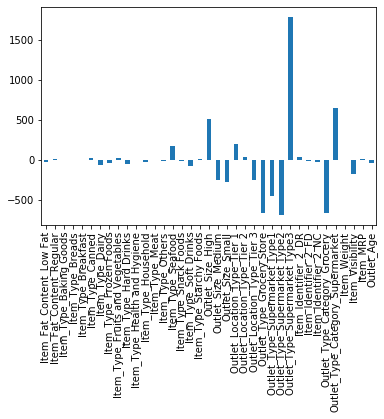

In [98]:
model = LinearRegression()
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )

RMSE of Train Data =  1128.907789356236
Cross validation Score  =  1133.4736105613622


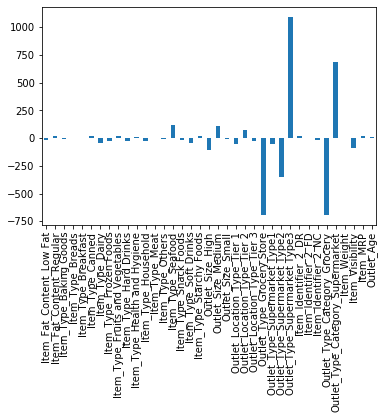

In [111]:
model = Ridge(alpha = 30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression.csv" )

RMSE of Train Data =  1140.2661956391537
Cross validation Score  =  1141.0112631830136


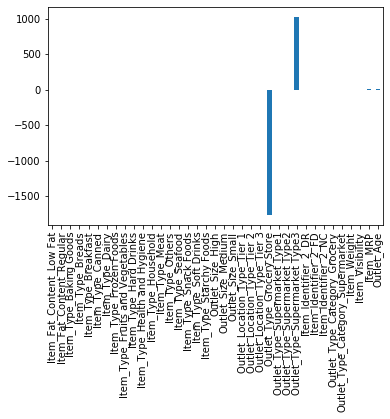

In [120]:
model = Lasso(alpha=30)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression.csv" )

RMSE of Train Data =  1243.0058476639092
Cross validation Score  =  1244.181751521292


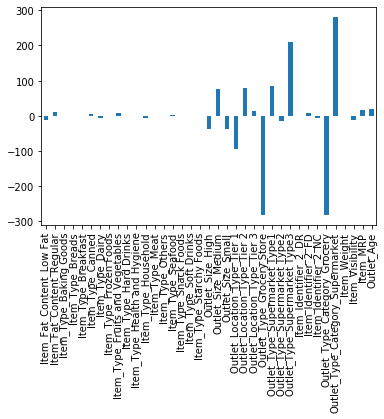

In [125]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression.csv" )